In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import regex as re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing,model_selection,linear_model
from sklearn.metrics import r2_score

In [2]:
full_df=pd.read_csv("car details v4.csv")

<Axes: >

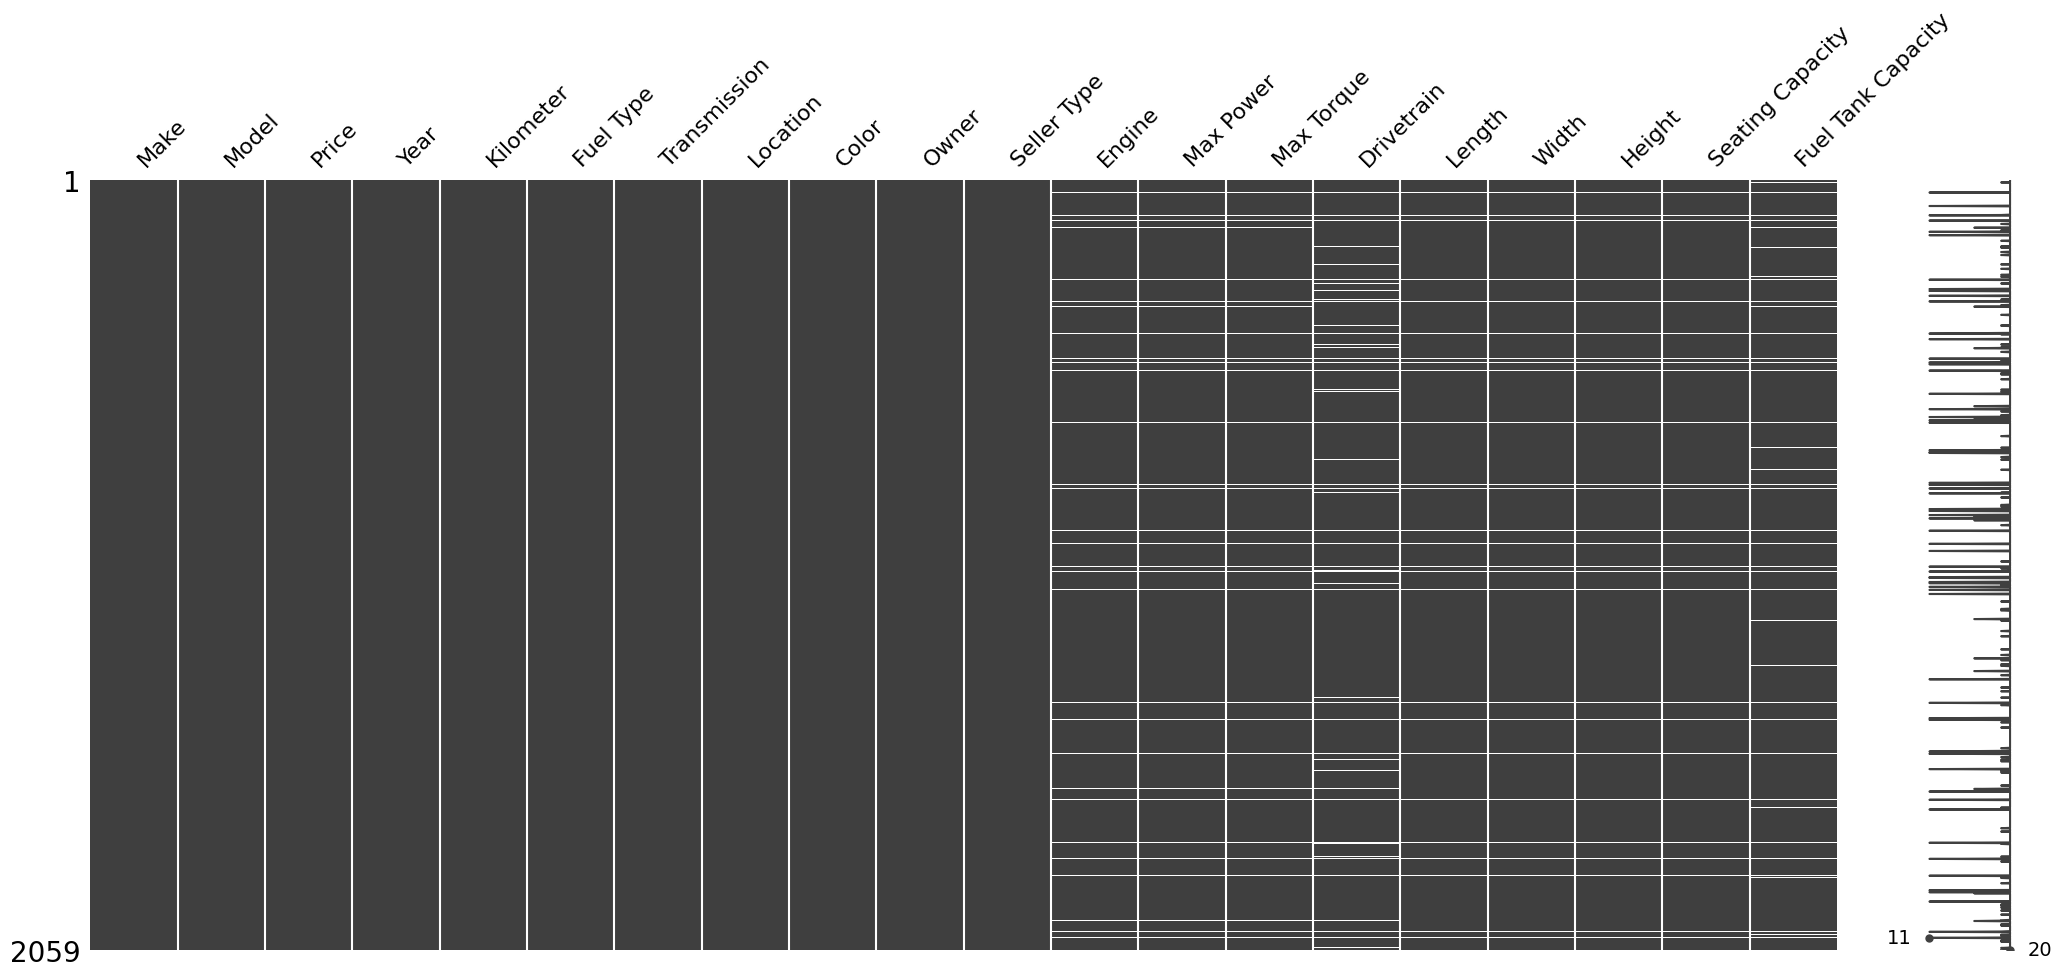

In [3]:
msno.matrix(full_df)

In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
train_df, test_df = train_test_split(full_df, test_size=0.2) # 80% train, 20% test

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1647 entries, 928 to 1179
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1586 non-null   object 
 12  Max Power           1586 non-null   object 
 13  Max Torque          1586 non-null   object 
 14  Drivetrain          1540 non-null   object 
 15  Length              1596 non-null   float64
 16  Width    

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 1377 to 836
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                412 non-null    object 
 1   Model               412 non-null    object 
 2   Price               412 non-null    int64  
 3   Year                412 non-null    int64  
 4   Kilometer           412 non-null    int64  
 5   Fuel Type           412 non-null    object 
 6   Transmission        412 non-null    object 
 7   Location            412 non-null    object 
 8   Color               412 non-null    object 
 9   Owner               412 non-null    object 
 10  Seller Type         412 non-null    object 
 11  Engine              393 non-null    object 
 12  Max Power           393 non-null    object 
 13  Max Torque          393 non-null    object 
 14  Drivetrain          383 non-null    object 
 15  Length              399 non-null    float64
 16  Width     

In [8]:
train_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
928,BMW,3-Series 320d Prestige,1679000,2016,46000,Diesel,Automatic,Delhi,Blue,Second,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4633.0,1811.0,1429.0,5.0,57.0
158,Mercedes-Benz,GLE 250 d,4550000,2017,34000,Diesel,Automatic,Navi Mumbai,Silver,First,Individual,2143 cc,201 bhp @ 3800 rpm,500 Nm @ 1600 rpm,AWD,4819.0,2141.0,1796.0,5.0,93.0
267,Mahindra,XUV500 W10,950000,2016,86000,Diesel,Manual,Lucknow,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
610,Honda,Jazz V Petrol,400000,2016,50000,Petrol,Manual,Kolkata,Red,First,Individual,1199 cc,89 bhp @ 6000 rpm,110 Nm @ 4800 rpm,FWD,3955.0,1694.0,1544.0,5.0,40.0
1668,Maruti Suzuki,Wagon R LXI CNG (O),299000,2015,92000,CNG,Manual,Mumbai,Brown,Second,Individual,998 cc,58 bhp @ 6200 rpm,77 Nm @ 3500 rpm,FWD,3599.0,1495.0,1700.0,5.0,35.0


In [9]:
test_df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
1377,Audi,A4 1.8 TFSI Multitronic Premium Plus,3125000,2020,28600,Petrol,Automatic,Lucknow,White,First,Individual,1798 cc,170 bhp @ 3800 rpm,320 Nm @ 1400 rpm,FWD,4701.0,1826.0,1427.0,5.0,63.0
1640,Datsun,Go T (O),345000,2019,60969,Petrol,Manual,Ranchi,Silver,First,Individual,1198 cc,67 bhp @ 5000 rpm,104 Nm @ 4000 rpm,FWD,3785.0,1635.0,1485.0,5.0,35.0
543,Tata,Harrier XZA Plus Dark Edition,1995000,2020,8000,Diesel,Automatic,Bhubaneswar,Black,First,Individual,1956 cc,168 bhp @ 3750 rpm,350 Nm @ 1750 rpm,FWD,4598.0,1894.0,1706.0,5.0,50.0
2052,Hyundai,i20 Sportz 1.4 CRDI,409999,2014,68000,Diesel,Manual,Agra,Silver,First,Individual,1396 cc,90@4000,220@1750,NaN,3940.0,1710.0,1505.0,5.0,45.0
2022,Kia,Seltos GTX Plus AT 1.4 [2019-2020],1975000,2021,7000,Petrol,Automatic,Bangalore,Grey,First,Individual,1353 cc,138 bhp @ 6000 rpm,242 Nm @ 1500 rpm,FWD,4315.0,1800.0,1645.0,5.0,50.0


In [10]:
def extract_engine_capacity(row):
    if pd.isna(row['Engine']):
        match = re.search(r'\b(\d+\.\d+)\b', row['Model'])
        if match:
            return str(int(float(match.group(1))*1000))
        else:
            return np.NaN
    return row['Engine']

train_df['Engine'] = train_df.apply(extract_engine_capacity, axis=1)


In [11]:
def extract_drivetrain(group):
    mode_value = group['Drivetrain'].mode().iloc[0]
    return group.fillna({'Drivetrain': mode_value})

train_df = train_df.groupby('Make').apply(extract_drivetrain)

In [12]:
train_df = train_df.dropna()
train_df['Engine'] = train_df['Engine'].str.replace('cc', '').astype(int)

<Axes: >

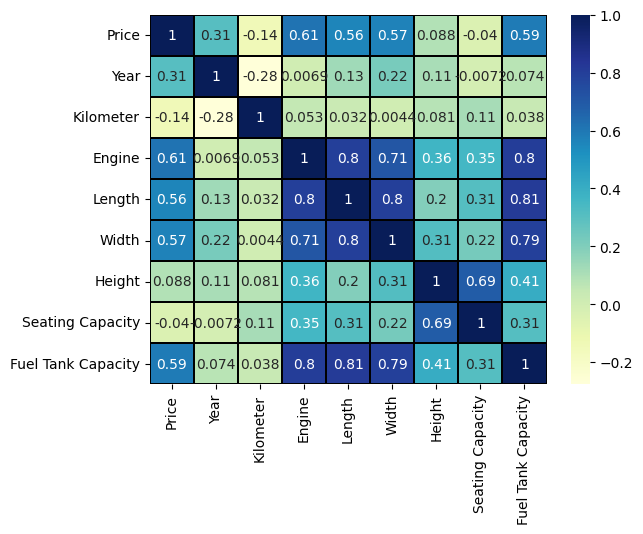

In [13]:
analysis_df = train_df.drop(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'Max Power', 'Max Torque'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')

In [14]:
train_df[['bhp', 'rpm power']] = train_df['Max Power'].str.split('@', expand=True)
train_df['bhp'] = train_df['bhp'].str.replace(' bhp', '').str.strip()
train_df['rpm power'] = train_df['rpm power'].str.replace(' rpm', '').str.strip()

In [15]:
train_df[['Nm', 'rpm torque']] = train_df['Max Torque'].str.split('@', expand=True)
train_df['Nm'] = train_df['Nm'].str.replace(' Nm', '').str.strip()
train_df['rpm torque'] = train_df['rpm torque'].str.replace(' rpm', '').str.strip()

In [16]:
train_df['bhp'].replace('', np.nan, inplace=True)
train_df['rpm power'].replace('', np.nan, inplace=True)
train_df['Nm'].replace('', np.nan, inplace=True)
train_df['rpm torque'].replace('', np.nan, inplace=True)

In [17]:
train_df = train_df.drop(['Max Power', 'Max Torque'], axis=1)
train_df.head()

Make                               Model    Price  Year  Kilometer  \
Make                                                                            
Audi 539   Audi                A4 35 TDI Technology  2799000  2017      72400   
     1577  Audi  Q5 2.0 TDI quattro Technology Pack  2690000  2016      57000   
     960   Audi         Q7 35 TDI Premium + Sunroof  2400000  2014      42533   
     1227  Audi                    A6 35 TDI Matrix  3075000  2017      17000   
     711   Audi              A3 35 TDI Premium Plus  2590000  2020      36978   

          Fuel Type Transmission    Location  Color   Owner  ... Drivetrain  \
Make                                                         ...              
Audi 539     Diesel    Automatic   Bangalore  White   First  ...        FWD   
     1577    Diesel    Automatic     Gurgaon  White   First  ...        AWD   
     960     Diesel    Automatic      Mumbai   Blue   First  ...        AWD   
     1227    Diesel    Automatic       Delhi  White   First  ...        FWD   
     711     Diesel    Automatic  Chandigarh   Blue  Second  ...        FWD   

           Length   Width  Height  Seating Capacity  Fuel Tank Capacity  bhp  \
Make                                                                           
Audi 539   4726.0  1842.0  1427.0               5.0                54.0  188   
     1577  4629.0  1898.0  1653.0               5.0                75.0  174   
     960   5089.0  1983.0  1737.0               7.0               100.0  241   
     1227  4933.0  1874.0  1455.0               5.0                75.0  190   
     711   4456.0  1796.0  1416.0               5.0                50.0  141   

           rpm power   Nm rpm torque  
Make                                  
Audi 539        4200  400       1750  
     1577       4200  380       1750  
     960        3800  550       1750  
     1227       3800  400       1750  
     711        3500  320       1750  

[5 rows x 22 columns]

In [18]:
train_df = train_df.dropna()

<Axes: >

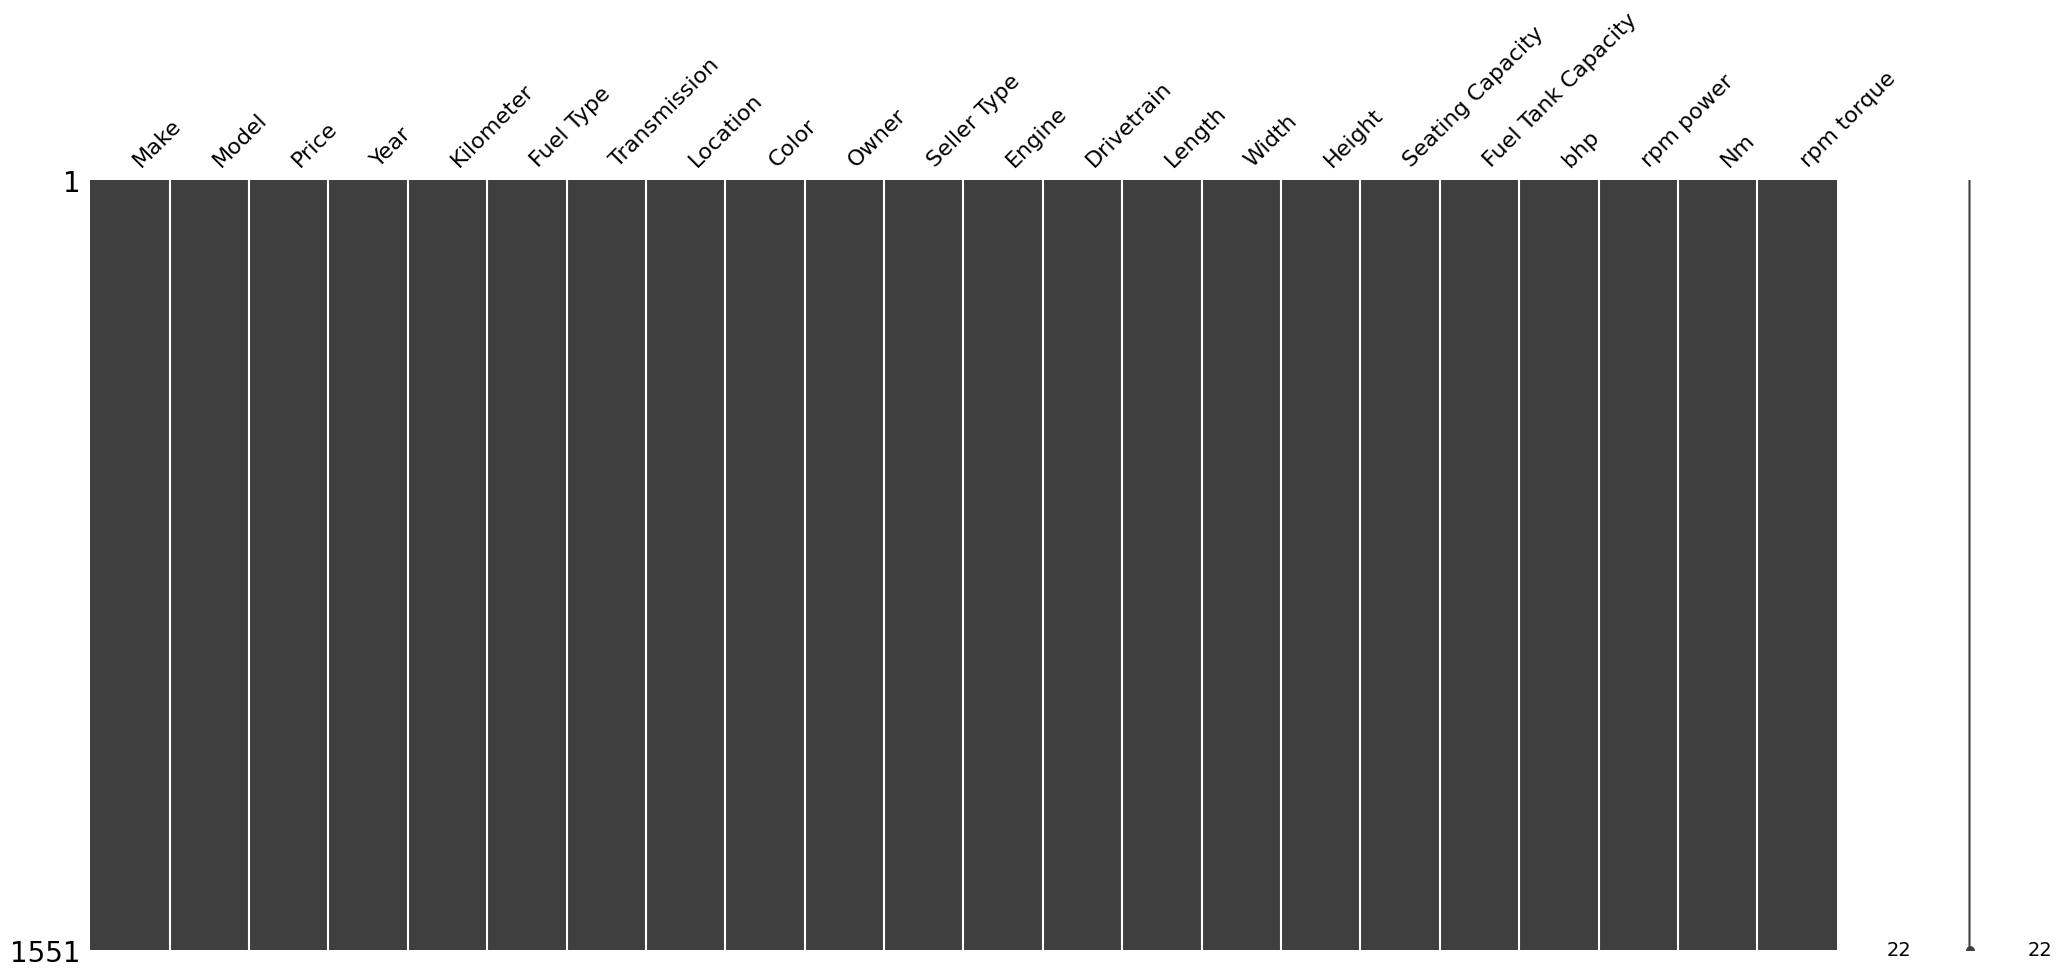

In [19]:
msno.matrix(train_df)

In [20]:
train_df.head()

Make                               Model    Price  Year  Kilometer  \
Make                                                                            
Audi 539   Audi                A4 35 TDI Technology  2799000  2017      72400   
     1577  Audi  Q5 2.0 TDI quattro Technology Pack  2690000  2016      57000   
     960   Audi         Q7 35 TDI Premium + Sunroof  2400000  2014      42533   
     1227  Audi                    A6 35 TDI Matrix  3075000  2017      17000   
     711   Audi              A3 35 TDI Premium Plus  2590000  2020      36978   

          Fuel Type Transmission    Location  Color   Owner  ... Drivetrain  \
Make                                                         ...              
Audi 539     Diesel    Automatic   Bangalore  White   First  ...        FWD   
     1577    Diesel    Automatic     Gurgaon  White   First  ...        AWD   
     960     Diesel    Automatic      Mumbai   Blue   First  ...        AWD   
     1227    Diesel    Automatic       Delhi  White   First  ...        FWD   
     711     Diesel    Automatic  Chandigarh   Blue  Second  ...        FWD   

           Length   Width  Height  Seating Capacity  Fuel Tank Capacity  bhp  \
Make                                                                           
Audi 539   4726.0  1842.0  1427.0               5.0                54.0  188   
     1577  4629.0  1898.0  1653.0               5.0                75.0  174   
     960   5089.0  1983.0  1737.0               7.0               100.0  241   
     1227  4933.0  1874.0  1455.0               5.0                75.0  190   
     711   4456.0  1796.0  1416.0               5.0                50.0  141   

           rpm power   Nm rpm torque  
Make                                  
Audi 539        4200  400       1750  
     1577       4200  380       1750  
     960        3800  550       1750  
     1227       3800  400       1750  
     711        3500  320       1750  

[5 rows x 22 columns]

In [21]:
year_mapping = {year: index for index, year in enumerate(sorted(train_df['Year'].unique()))}
train_df['Year'] = train_df['Year'].map(year_mapping)

In [22]:
train_df = train_df.dropna()

In [23]:
columns_to_normalize = ['Price', 'Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'bhp', 'rpm power', 'Nm', 'rpm torque']

scaler = preprocessing.MinMaxScaler()

train_df[columns_to_normalize] = scaler.fit_transform(train_df[columns_to_normalize])

<Axes: >

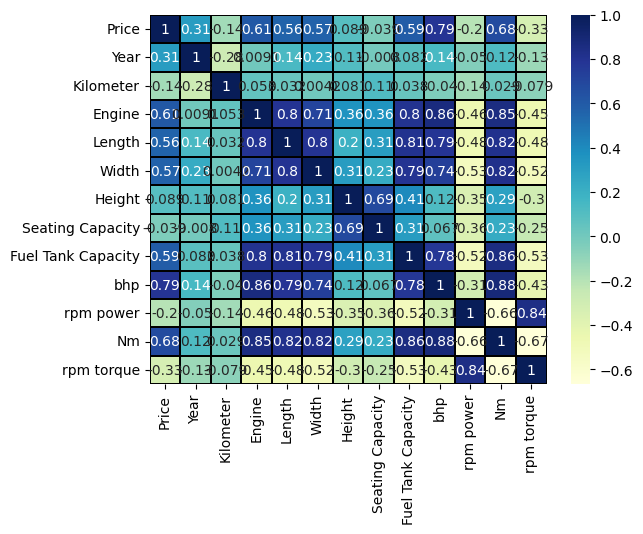

In [24]:
analysis_df = train_df.drop(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'], axis=1)
sns.heatmap(analysis_df.corr(), annot=True, cmap="YlGnBu", linewidths=0.1, linecolor='black')

In [25]:
train_df.head()

Make                               Model     Price  Year  \
Make                                                                  
Audi 539   Audi                A4 35 TDI Technology  0.078682    12   
     1577  Audi  Q5 2.0 TDI quattro Technology Pack  0.075563    11   
     960   Audi         Q7 35 TDI Premium + Sunroof  0.067266     9   
     1227  Audi                    A6 35 TDI Matrix  0.086578    12   
     711   Audi              A3 35 TDI Premium Plus  0.072702    15   

           Kilometer Fuel Type Transmission    Location  Color   Owner  ...  \
Make                                                                    ...   
Audi 539    0.036200    Diesel    Automatic   Bangalore  White   First  ...   
     1577   0.028500    Diesel    Automatic     Gurgaon  White   First  ...   
     960    0.021267    Diesel    Automatic      Mumbai   Blue   First  ...   
     1227   0.008500    Diesel    Automatic       Delhi  White   First  ...   
     711    0.018489    Diesel    Automatic  Chandigarh   Blue  Second  ...   

          Drivetrain    Length     Width    Height  Seating Capacity  \
Make                                                                   
Audi 539         FWD  0.658704  0.492617  0.273657          0.500000   
     1577        AWD  0.619433  0.567785  0.562660          0.500000   
     960         AWD  0.805668  0.681879  0.670077          0.833333   
     1227        FWD  0.742510  0.535570  0.309463          0.500000   
     711         FWD  0.549393  0.430872  0.259591          0.500000   

           Fuel Tank Capacity     bhp  rpm power        Nm  rpm torque  
Make                                                                    
Audi 539             0.433333  0.2448   0.241573  0.480874    0.293578  
     1577            0.666667  0.2224   0.241573  0.453552    0.293578  
     960             0.944444  0.3296   0.166667  0.685792    0.293578  
     1227            0.666667  0.2480   0.166667  0.480874    0.293578  
     711             0.388889  0.1696   0.110487  0.371585    0.293578  

[5 rows x 22 columns]

In [26]:
def one_hot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df
train_df = one_hot_encode(train_df, columns=['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Drivetrain'])

In [27]:
train_df.head()

Model     Price  Year  Kilometer  \
Make                                                                       
Audi 539                 A4 35 TDI Technology  0.078682    12   0.036200   
     1577  Q5 2.0 TDI quattro Technology Pack  0.075563    11   0.028500   
     960          Q7 35 TDI Premium + Sunroof  0.067266     9   0.021267   
     1227                    A6 35 TDI Matrix  0.086578    12   0.008500   
     711               A3 35 TDI Premium Plus  0.072702    15   0.018489   

             Engine    Length     Width    Height  Seating Capacity  \
Make                                                                  
Audi 539   0.225201  0.658704  0.492617  0.273657          0.500000   
     1577  0.225201  0.619433  0.567785  0.562660          0.500000   
     960   0.392594  0.805668  0.681879  0.670077          0.833333   
     1227  0.225201  0.742510  0.535570  0.309463          0.500000   
     711   0.225201  0.549393  0.430872  0.259591          0.500000   

           Fuel Tank Capacity  ...  Owner_Fourth  Owner_Second  Owner_Third  \
Make                           ...                                            
Audi 539             0.433333  ...         False         False        False   
     1577            0.666667  ...         False         False        False   
     960             0.944444  ...         False         False        False   
     1227            0.666667  ...         False         False        False   
     711             0.388889  ...         False          True        False   

           Owner_UnRegistered Car  Seller Type_Commercial Registration  \
Make                                                                     
Audi 539                    False                                False   
     1577                   False                                False   
     960                    False                                False   
     1227                   False                                False   
     711                    False                                False   

           Seller Type_Corporate  Seller Type_Individual  Drivetrain_AWD  \
Make                                                                       
Audi 539                   False                    True           False   
     1577                  False                    True            True   
     960                   False                    True            True   
     1227                  False                    True           False   
     711                   False                    True           False   

           Drivetrain_FWD  Drivetrain_RWD  
Make                                       
Audi 539             True           False  
     1577           False           False  
     960            False           False  
     1227            True           False  
     711             True           False  

[5 rows x 156 columns]

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1551 entries, ('Audi', 539) to ('Volvo', 1775)
Columns: 156 entries, Model to Drivetrain_RWD
dtypes: bool(142), float64(12), int64(1), object(1)
memory usage: 468.0+ KB


In [29]:
y = train_df[['Price']].values
X = train_df[['Engine']].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 0.37


In [31]:
y_adv = y
X_adv = train_df.drop(['Model'], axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_adv, y_adv, test_size=0.4, random_state=69)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2score = r2_score(y_test, y_pred)
print("R2 Score: %.2f" % r2score)

R2 Score: 1.00


In [33]:
model.score(X_test, y_test)

0.9999999999879582